# First attempt at making nifty work for the MUSTANG data

## Step 1: Load input map

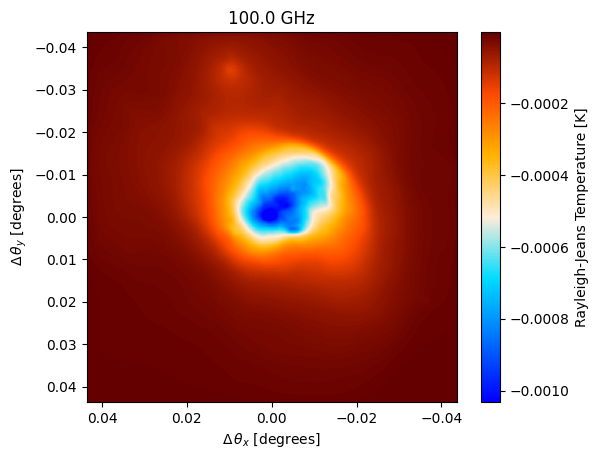

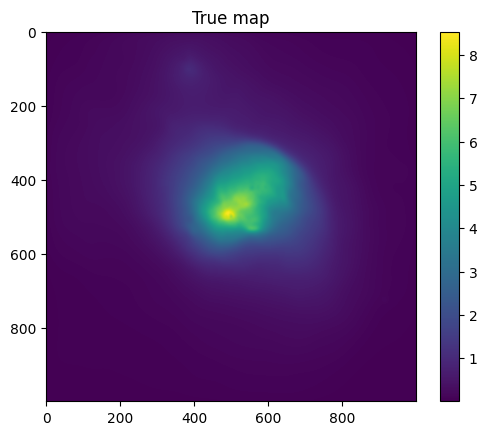

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import maria

import jax.numpy as jnp

map_filename = maria.io.fetch("maps/cluster.fits")

# load in the map from a fits file
input_map = maria.map.read_fits(filename=map_filename, #filename
                                resolution=-8.714e-05, #pixel size in degrees
                                index=0, #index for fits file
                                center=(150, 10), # position in the sky
                                units='Jy/pixel' # Units of the input map 
                               )

input_map.to(units="K_RJ").plot()
plt.show()

# Sava mapdata as jax array
mapdata_input = np.float64((input_map.data[0].T)*-1e7)

plt.imshow(mapdata_input)
plt.colorbar()
plt.title('True map')
plt.show()

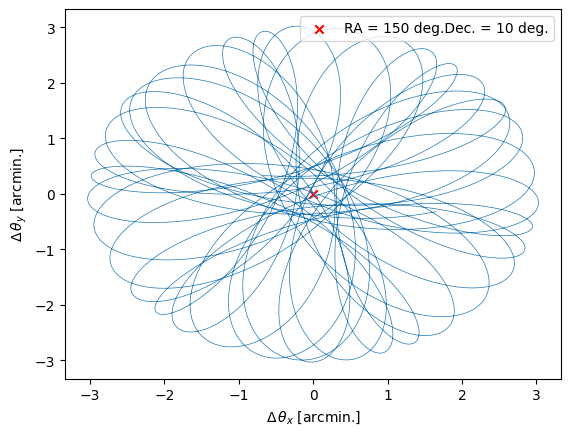

In [2]:
#load the map into maria
plan = maria.get_plan(scan_pattern="daisy", # scanning pattern
                      scan_options={"radius": 0.05, "speed": 0.01}, # in degrees
                      duration=600, # integration time in seconds
                      sample_rate=50, # in Hz
                      scan_center=(150, 10), # position in the sky
                      frame="ra_dec")

plan.plot()

In [3]:
instrument = maria.get_instrument('MUSTANG-2')
# instrument.plot()

sim_truthmap = maria.Simulation(instrument, 
                       plan=plan,
                       site="llano_de_chajnantor", 
                       map=input_map,
                       noise=False,
                      #  atmosphere="2d",
                    #    cmb="generate",
                      )

tod_truthmap = sim_truthmap.run()

sim_noisedmap = maria.Simulation(instrument, 
                       plan=plan,
                       site="llano_de_chajnantor", 
                      #  map=input_map,
                      #  noise=False,
                      #  atmosphere="2d",
                    #    cmb="generate",
                      )

tod_noisedmap = sim_noisedmap.run()

sim_cmb = maria.Simulation(instrument, 
                       plan=plan,
                       site="llano_de_chajnantor", 
                      #  map=input_map,
                       noise=False,
                      #  atmosphere="2d",
                       cmb="generate",
                       cmb_kwargs={"nside": 8192}
                      )

tod_cmb = sim_cmb.run()

sim_atmos = maria.Simulation(instrument, 
                       plan=plan,
                       site="llano_de_chajnantor", 
                      #  map=input_map,
                       noise=False,
                       atmosphere="2d",
                      #  cmb="generate",
                      #  cmb_kwargs={"nside": 8192}
                      )

tod_atmos = sim_atmos.run()

2024-07-18 17:06:45.838 INFO: Constructed instrument.
2024-07-18 17:06:45.839 INFO: Constructed plan.
2024-07-18 17:06:45.840 INFO: Constructed site.
2024-07-18 17:06:46.369 INFO: Constructed boresight.
2024-07-18 17:06:46.618 INFO: Constructed offsets.


Initialized base in 779 ms.


Sampling map (m2/f093): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]
2024-07-18 17:06:49.008 INFO: Constructed instrument.
2024-07-18 17:06:49.008 INFO: Constructed plan.
2024-07-18 17:06:49.009 INFO: Constructed site.
2024-07-18 17:06:49.125 INFO: Constructed boresight.


HERE shape (217, 30000)
HERE 2 shape (217, 30000)


2024-07-18 17:06:49.344 INFO: Constructed offsets.


Initialized base in 337 ms.


Generating noise: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]
2024-07-18 17:06:49.788 INFO: Constructed instrument.
2024-07-18 17:06:49.789 INFO: Constructed plan.
2024-07-18 17:06:49.789 INFO: Constructed site.
2024-07-18 17:06:49.906 INFO: Constructed boresight.
2024-07-18 17:06:50.117 INFO: Constructed offsets.


Initialized base in 329 ms.


Generating CMB:   0%|          | 0/1 [00:00<?, ?it/s]2024-07-18 17:06:50.573 INFO: Sigma is 0.000000 arcmin (0.000000 rad) 
2024-07-18 17:06:50.573 INFO: -> fwhm is 0.000000 arcmin
Sampling CMB (m2/f093): 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]
2024-07-18 17:07:30.064 INFO: Constructed instrument.
2024-07-18 17:07:30.065 INFO: Constructed plan.
2024-07-18 17:07:30.066 INFO: Constructed site.
2024-07-18 17:07:30.193 INFO: Constructed boresight.
2024-07-18 17:07:30.416 INFO: Constructed offsets.


Initialized base in 352 ms.


Initializing atmospheric layers: 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]
Generating atmosphere: 4it [00:00,  4.48it/s]
Computing atm. emission (m2/f093):   0%|          | 0/1 [00:00<?, ?it/s]

det_power_grid shape: (10, 3, 9)
HERE
(217, 30000)
HERE2
275.4646611427954
HERE3
dask.array<degrees, shape=(217, 30000), dtype=float32, chunksize=(217, 30000), chunktype=numpy.ndarray>


Computing atm. emission (m2/f093): 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


self.data['atmosphere'][band_index] shape (217, 30000)


Computing atm. transmission (m2/f093): 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


## Re-make map with maria:

calling _run for band m2/f093


Running mapper (m2/f093):   0%|          | 0/1 [00:00<?, ?it/s]

self.tods: [TOD(shape=(217, 30000), fields=['map'])]
TOD(shape=(217, 30000), fields=['map'])
Band_tod: TOD(shape=(217, 30000), fields=['map'])


Running mapper (m2/f093): 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


calling _run for band m2/f093


Running mapper (m2/f093):   0%|          | 0/1 [00:00<?, ?it/s]

self.tods: [TOD(shape=(217, 30000), fields=['noise'])]
TOD(shape=(217, 30000), fields=['noise'])
Band_tod: TOD(shape=(217, 30000), fields=['noise'])


Running mapper (m2/f093): 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


calling _run for band m2/f093


Running mapper (m2/f093):   0%|          | 0/1 [00:00<?, ?it/s]

self.tods: [TOD(shape=(217, 30000), fields=['cmb'])]
TOD(shape=(217, 30000), fields=['cmb'])
Band_tod: TOD(shape=(217, 30000), fields=['cmb'])


Running mapper (m2/f093): 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


calling _run for band m2/f093


Running mapper (m2/f093):   0%|          | 0/1 [00:00<?, ?it/s]

self.tods: [TOD(shape=(217, 30000), fields=['atmosphere'])]
TOD(shape=(217, 30000), fields=['atmosphere'])
Band_tod: TOD(shape=(217, 30000), fields=['atmosphere'])


Running mapper (m2/f093): 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


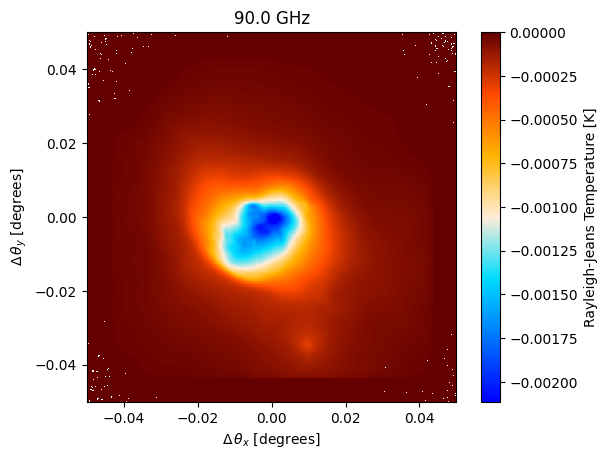

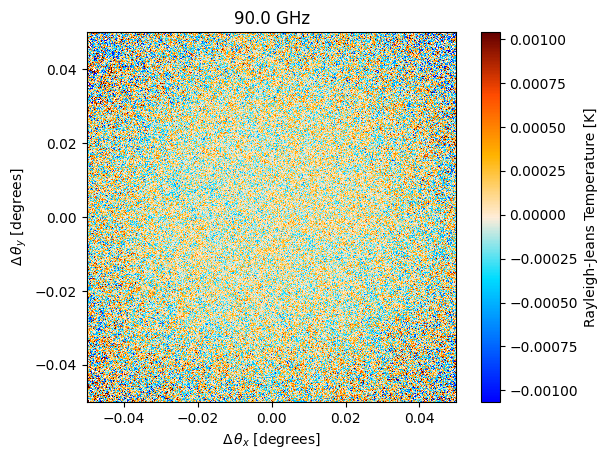

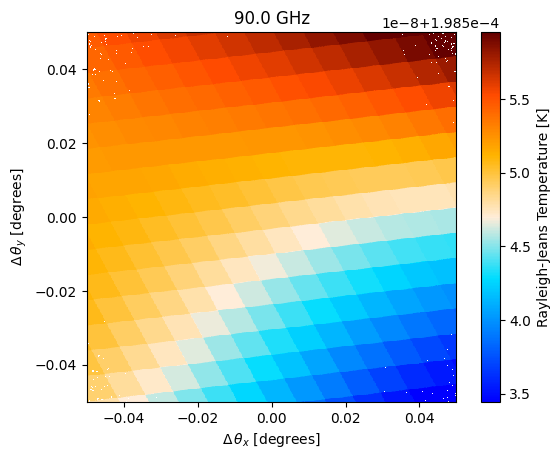

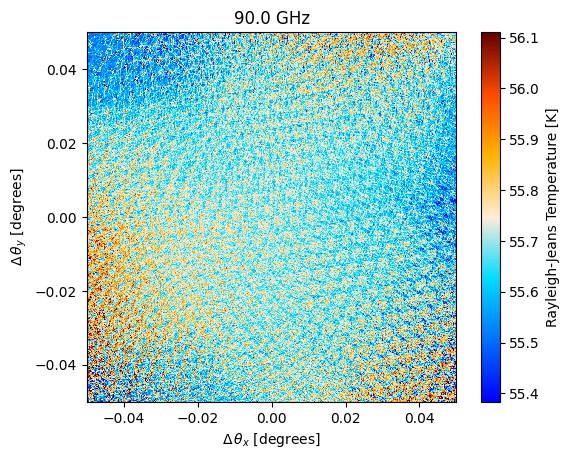

In [4]:

from maria.map.mappers import BinMapper

mapper_truthmap = BinMapper(center=(150, 10), frame="ra_dec", width=0.1, height=0.1, resolution=2e-4, map_postprocessing={"gaussian_filter": {"sigma": 0}} )
mapper_truthmap.add_tods(tod_truthmap)
output_truthmap = mapper_truthmap.run()

mapper_noisedmap = BinMapper(center=(150, 10), frame="ra_dec", width=0.1, height=0.1, resolution=2e-4, map_postprocessing={"gaussian_filter": {"sigma": 0}} )
mapper_noisedmap.add_tods(tod_noisedmap)
output_noisedmap = mapper_noisedmap.run()

mapper_cmb = BinMapper(center=(150, 10), frame="ra_dec", width=0.1, height=0.1, resolution=2e-4, map_postprocessing={"gaussian_filter": {"sigma": 0}} )
mapper_cmb.add_tods(tod_cmb)
output_cmb = mapper_cmb.run()

mapper_atmos = BinMapper(center=(150, 10), frame="ra_dec", width=0.1, height=0.1, resolution=2e-4, map_postprocessing={"gaussian_filter": {"sigma": 0}} )
mapper_atmos.add_tods(tod_atmos)
output_atmos = mapper_atmos.run()

output_truthmap.plot()
output_noisedmap.plot()
output_cmb.plot()
output_atmos.plot()

## Smooth out CMB

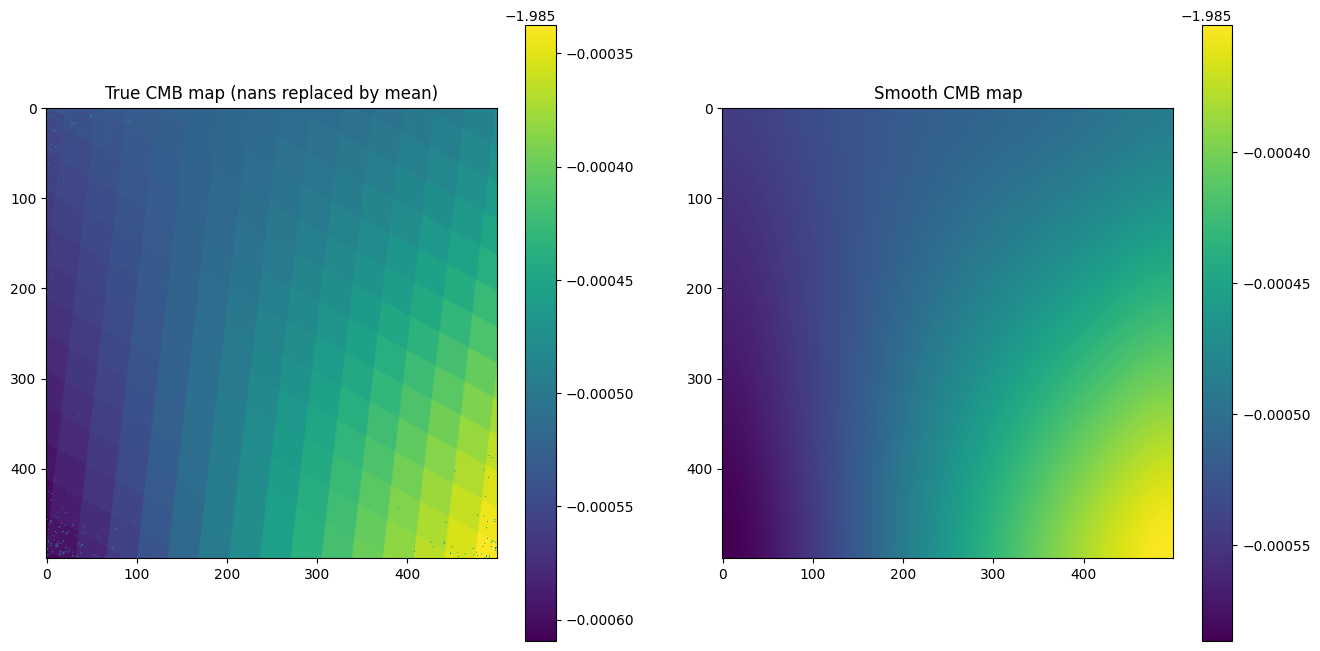

In [5]:
import scipy.ndimage as ndimage

mapdata_cmb_true = np.float64((output_cmb.data[0])*-1e4)
mapdata_cmb_true = np.nan_to_num(mapdata_cmb_true, nan=np.nanmean(mapdata_cmb_true)) # replace nan value by img mean

# npix = 12
npix = 30
mapdata_cmb = ndimage.gaussian_filter(mapdata_cmb_true, (npix, npix))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

im0 = axes[0].imshow(mapdata_cmb_true)
axes[0].title.set_text('True CMB map (nans replaced by mean)')
fig.colorbar(im0)

im1 = axes[1].imshow(mapdata_cmb)
axes[1].title.set_text('Smooth CMB map')
fig.colorbar(im1)

plt.show()

## Make noisy map

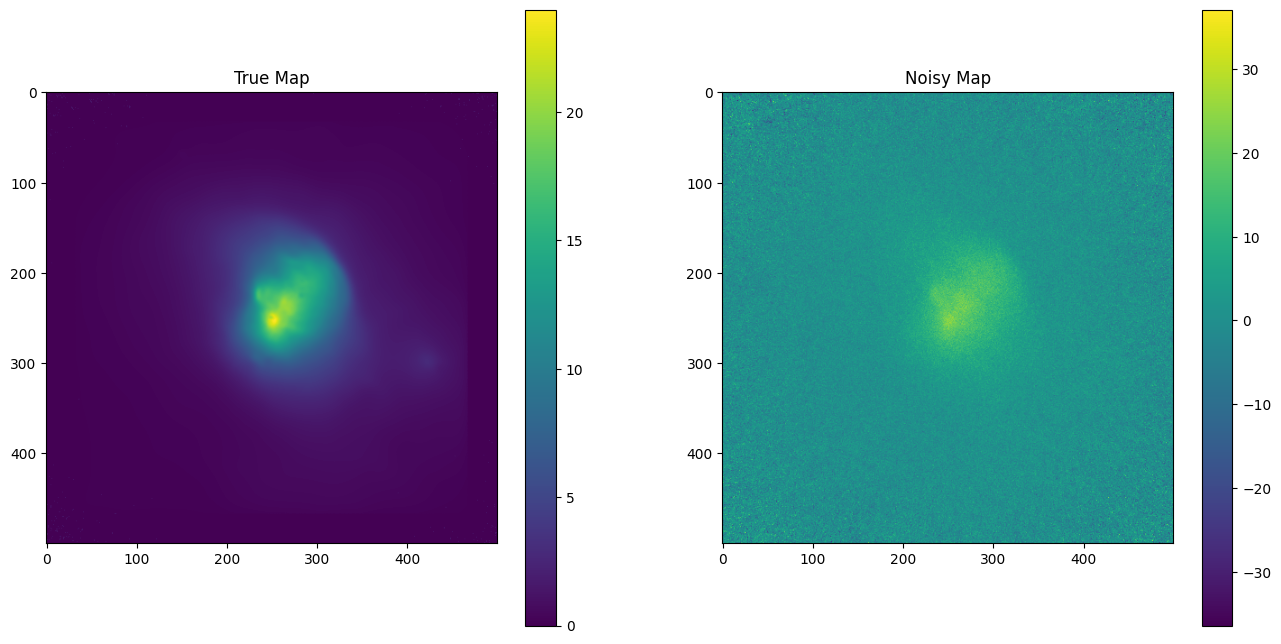

In [6]:
# Make inputdata
mapdata_truth = np.float64((output_truthmap.data[0])*-1e4)
# mapdata_noised = np.float64((output_noisedmap.data[0])*-1e4)*1e-1 + mapdata_truth # 10% noise level
# mapdata_noised = np.float64((output_noisedmap.data[0])*-1e4)*5e-1 + mapdata_truth # 50% noise level
mapdata_noised = np.float64((output_noisedmap.data[0])*-1e4) + mapdata_truth # 100% noise level

# replace nans with 0
mapdata_truth = np.nan_to_num(mapdata_truth, nan=np.nanmean(mapdata_truth)) # replace nan value by img mean
mapdata_noised = np.nan_to_num(mapdata_noised, nan=np.nanmean(mapdata_noised)) # replace nan value by img mean

# Plot Maps
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

im0 = axes[0].imshow(mapdata_truth)
axes[0].title.set_text('True Map')
fig.colorbar(im0)

im1 = axes[1].imshow(mapdata_noised)
axes[1].title.set_text('Noisy Map')
fig.colorbar(im1)

plt.show()

## Add CMB to truth map

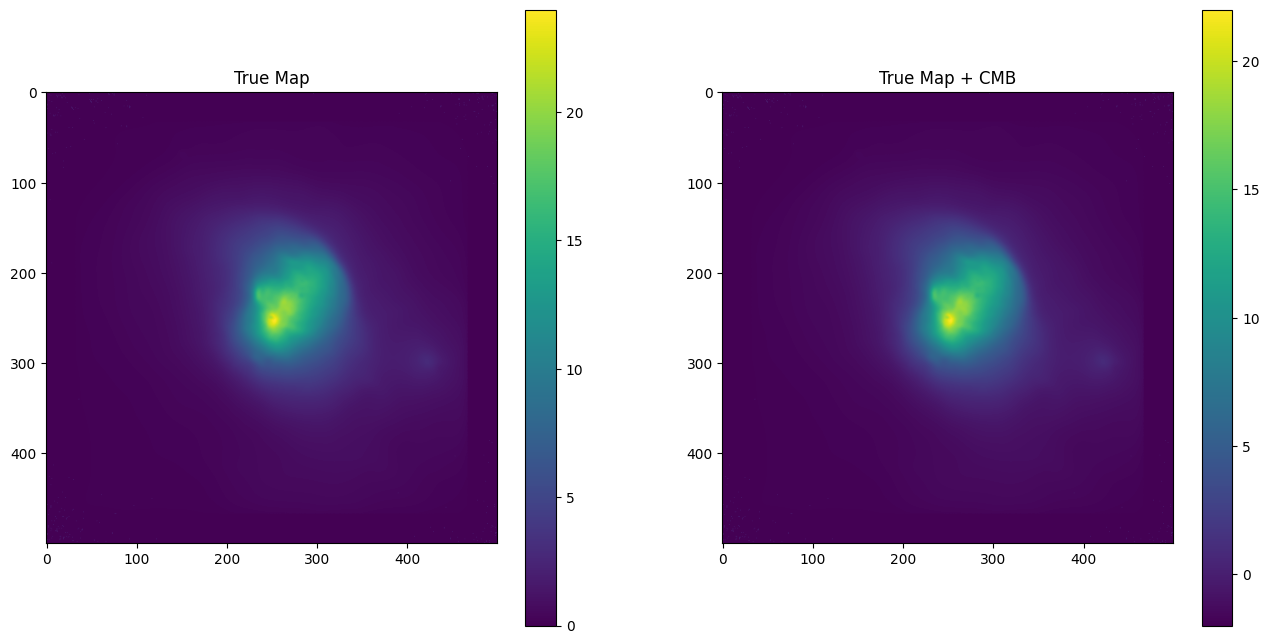

In [35]:
# Make inputdata
mapdata_truth = np.float64((output_truthmap.data[0])*-1e4)
# mapdata_truth_and_cmb = mapdata_cmb + mapdata_truth*1e-5
mapdata_truth_and_cmb = mapdata_cmb + mapdata_truth

# replace nans with 0
mapdata_truth = np.nan_to_num(mapdata_truth, nan=np.nanmean(mapdata_truth)) # replace nan value by img mean
mapdata_truth_and_cmb = np.nan_to_num(mapdata_truth_and_cmb, nan=np.nanmean(mapdata_truth_and_cmb)) # replace nan value by img mean

# Plot Maps
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

im0 = axes[0].imshow(mapdata_truth)
axes[0].title.set_text('True Map')
fig.colorbar(im0)

im0 = axes[1].imshow(mapdata_truth_and_cmb)
# axes[1].title.set_text('True Map*1e-5 + CMB')
axes[1].title.set_text('True Map + CMB')
fig.colorbar(im0)

plt.show()

## Next, initialise Nifty prior model

In [36]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1,2'

import jax
import nifty8.re as jft
import matplotlib.pyplot as plt

from jax import random

seed = 42
key = random.PRNGKey(seed)

In [37]:
# dims = (128, 128)
# dims = (1000, 1000)
dims = (500, 500)

# Map model

# correlated field zero mode GP offset and stddev
cf_zm_map = dict(offset_mean=1.3, offset_std=(1e-1, 1e-1))
# correlated field fluctuations (mostly don't need tuning)
cf_fl_map = dict(
    fluctuations=(1.0e0, 1e-1), # fluctuations: y-offset in power spectrum in fourier space (zero mode)
    loglogavgslope=(-1.5e0, 1e0), # power-spectrum slope in log-log space in frequency domain (Fourier space)
    flexibility=(1.5e0, 5e-1), # deviation from simple power-law
    asperity=(5e-1, 5e-2), # small scale features in power-law
)

# put together in correlated field model
cfm_map = jft.CorrelatedFieldMaker("cfmap")
cfm_map.set_amplitude_total_offset(**cf_zm_map)
cfm_map.add_fluctuations(
    dims, distances=1.0 / dims[0], **cf_fl_map, prefix="ax1", non_parametric_kind="power"
)
gp_map = cfm_map.finalize()

# CMB model

# correlated field zero mode GP offset and stddev
cf_zm_cmb = dict(offset_mean=-2, offset_std=(2e-1, 2e-1))
# correlated field fluctuations (mostly don't need tuning)
cf_fl_cmb = dict(
    fluctuations=(1e0, 1e-1), # fluctuations: y-offset in power spectrum in fourier space (zero mode)
    loglogavgslope=(-5e-1, 1e0), # power-spectrum slope in log-log space in frequency domain (Fourier space)
    flexibility=(1.5e0, 5e-1), # deviation from simple power-law
    asperity=(5e-1, 5e-2), # small scale features in power-law
)

# put together in correlated field model
cfm_cmb = jft.CorrelatedFieldMaker("cfcmb")
cfm_cmb.set_amplitude_total_offset(**cf_zm_cmb)
cfm_cmb.add_fluctuations(
    dims, distances=1.0 / dims[0], **cf_fl_cmb, prefix="ax1", non_parametric_kind="power"
)
gp_cmb = cfm_cmb.finalize()

In [38]:
# # Draw sample from prior model and plot: # Does not work for custom name gp?

# key, sub = random.split(key)
# xi = jft.random_like(sub, gp_cmb.domain) # generate std normal parameters 
# res = gp_map(xi) # draw sample from gp

# plt.imshow(res)
# plt.colorbar()
# plt.title('Prior sample')
# plt.show()

In [39]:
# Define simple signal model without point-sources for now:
class Signal(jft.Model):
    def __init__(self, gp_map, gp_cmb):
        self.gp_map = gp_map
        self.gp_cmb = gp_cmb
        super().__init__(init=self.gp_map.init | self.gp_cmb.init)

    def __call__(self, x):
        # return self.gp_map(x)*1e-5 + self.gp_cmb(x)
        return self.gp_map(x) + self.gp_cmb(x)

# signal_response = Signal(gp_map, gp_cmb)
signal_response = Signal(gp_map, gp_cmb)

# Define noise covariance
# noise_cov_inv = lambda x: 1e-1**-2 * x # 10% noise
# noise_cov_inv = lambda x: 5e+0**-2 * x # 50% noise
# noise_cov_inv = lambda x: 4e+1**-2 * x # 100% noise
noise_cov_inv = lambda x: 1e-2**-2 * x # CMB

print("mean:", mapdata_truth_and_cmb.mean())

# Combine in likelihood
lh = jft.Gaussian(mapdata_truth_and_cmb, noise_cov_inv).amend(signal_response)

assuming a diagonal covariance matrix;
setting `std_inv` to `cov_inv(ones_like(data))**0.5`


mean: -0.6587103243004593


## Next, create a Maximum Aposteriori (MAP) estimation, i.e. best fit point

In [40]:
n_it = 1
# delta = 1e-4 # default
# delta = 1e-8 # 10% noise level
# delta = 1e-6 # 50% noise level
# delta = 1e-20 # 100% noise level -> removes noise but does not find smaller scale features
# delta = 1e-8 # CMB
delta = 1e-10 # CMB + true map *1e-5
n_samples = 0 # no samples -> maximum aposteriory posterior

key, k_i, k_o = random.split(key, 3)

samples, state = jft.optimize_kl(
    lh, # likelihood
    jft.Vector(lh.init(k_i)), # initial position in model space (initialisation)
    n_total_iterations=n_it, # no of optimisation steps (global)
    n_samples=n_samples, # draw samples
    key=k_o, # random jax init
    draw_linear_kwargs=dict( # sampling parameters
        cg_name="SL",
        cg_kwargs=dict(absdelta=delta * jft.size(lh.domain) / 10.0, maxiter=100),
    ),
    nonlinearly_update_kwargs=dict( # map from multivariate gaussian to more compl. distribution (coordinate transformations)
        minimize_kwargs=dict(
            name="SN",
            xtol=delta,
            cg_kwargs=dict(name=None),
            maxiter=5,
        )
    ),
    kl_kwargs=dict( # shift transformed multivar gauss to best match true posterior
        minimize_kwargs=dict(
            name="M", xtol=delta, cg_kwargs=dict(name=None), maxiter=100
        )
    ),
    sample_mode="nonlinear_resample", # how steps are combined (samples + nonlin + KL)
)

OPTIMIZE_KL: Starting 0001
M: →:0.25 ↺:False #∇²:07 |↘|:2.417255e+02 ➽:5.841900e-05
M: Iteration 1 ⛰:+5.160790e+09 Δ⛰:7.720058e+09
M: →:1.0 ↺:False #∇²:13 |↘|:5.128552e+02 ➽:5.841900e-05
M: Iteration 2 ⛰:+4.556641e+09 Δ⛰:6.041488e+08
M: →:1.0 ↺:False #∇²:19 |↘|:4.244311e+02 ➽:5.841900e-05
M: Iteration 3 ⛰:+3.371964e+09 Δ⛰:1.184677e+09
M: →:1.0 ↺:False #∇²:25 |↘|:1.033523e+02 ➽:5.841900e-05
M: Iteration 4 ⛰:+6.593934e+08 Δ⛰:2.712571e+09
M: →:1.0 ↺:False #∇²:31 |↘|:1.850784e+02 ➽:5.841900e-05
M: Iteration 5 ⛰:+2.066353e+08 Δ⛰:4.527581e+08
M: →:1.0 ↺:False #∇²:37 |↘|:6.577294e+01 ➽:5.841900e-05
M: Iteration 6 ⛰:+1.607473e+08 Δ⛰:4.588805e+07
M: →:1.0 ↺:False #∇²:43 |↘|:1.243931e+02 ➽:5.841900e-05
M: Iteration 7 ⛰:+1.366604e+08 Δ⛰:2.408686e+07
M: →:1.0 ↺:False #∇²:49 |↘|:3.601422e+01 ➽:5.841900e-05
M: Iteration 8 ⛰:+1.085355e+08 Δ⛰:2.812488e+07
M: →:1.0 ↺:False #∇²:55 |↘|:1.681488e+02 ➽:5.841900e-05
M: Iteration 9 ⛰:+8.232426e+07 Δ⛰:2.621129e+07
M: →:1.0 ↺:False #∇²:61 |↘|:2.651642e+01 ➽:5.

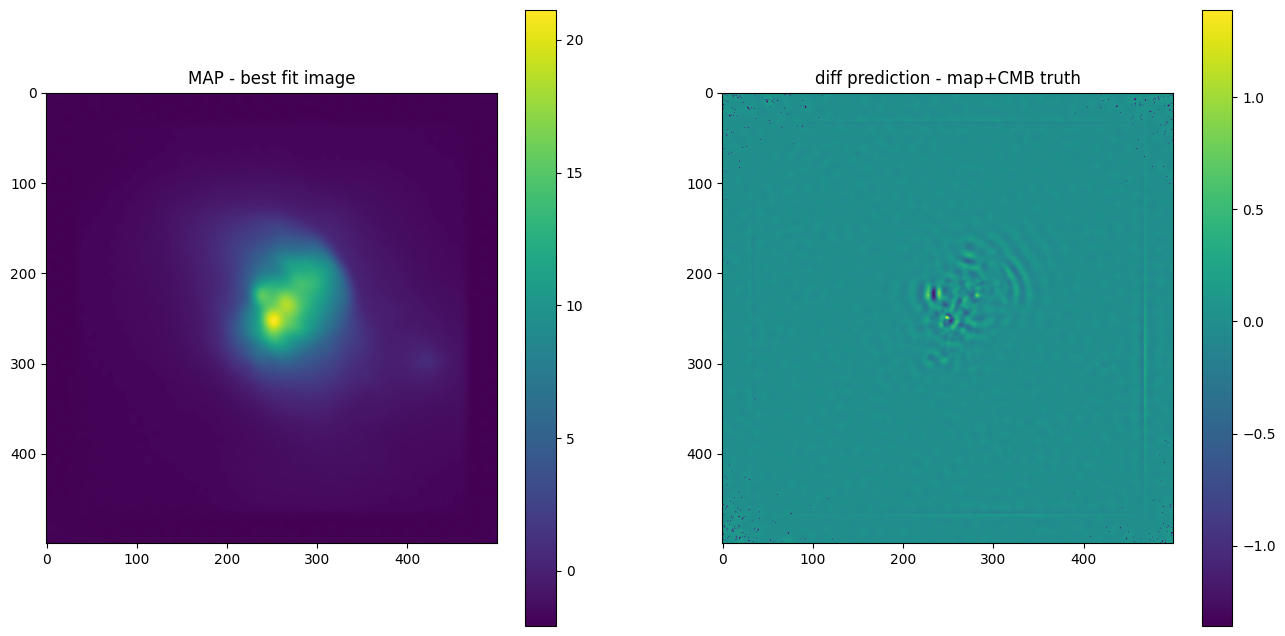

In [41]:
# plot maximum of posterior (mode)
sig_map = signal_response(samples.pos)
# sig_map = gp(samples.pos) # when splitting up in different field models

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

im0 = axes[0].imshow(sig_map)
axes[0].title.set_text('MAP - best fit image')
fig.colorbar(im0)

im1 = axes[1].imshow(sig_map - mapdata_truth_and_cmb)
axes[1].title.set_text('diff prediction - map+CMB truth')
fig.colorbar(im1)

plt.show()

# fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# im0 = axes[0].imshow(mapdata_noised)
# axes[0].title.set_text('noisy map')
# fig.colorbar(im0)

# im1 = axes[1].imshow(mapdata_noised - mapdata_truth)
# axes[1].title.set_text('Noise')
# fig.colorbar(im1)

# plt.show()

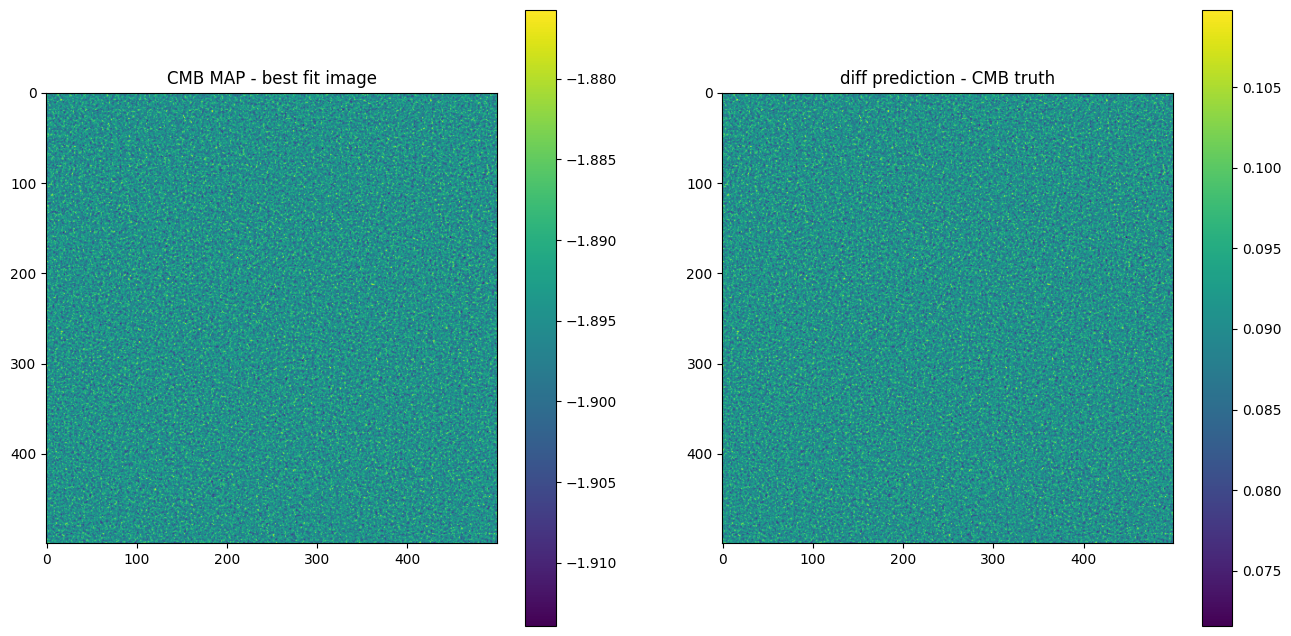

In [42]:
sig_map = gp_cmb(samples.pos)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

im0 = axes[0].imshow(sig_map)
axes[0].title.set_text('CMB MAP - best fit image')
fig.colorbar(im0)

im1 = axes[1].imshow(sig_map - mapdata_cmb)
axes[1].title.set_text('diff prediction - CMB truth')
fig.colorbar(im1)

plt.show()

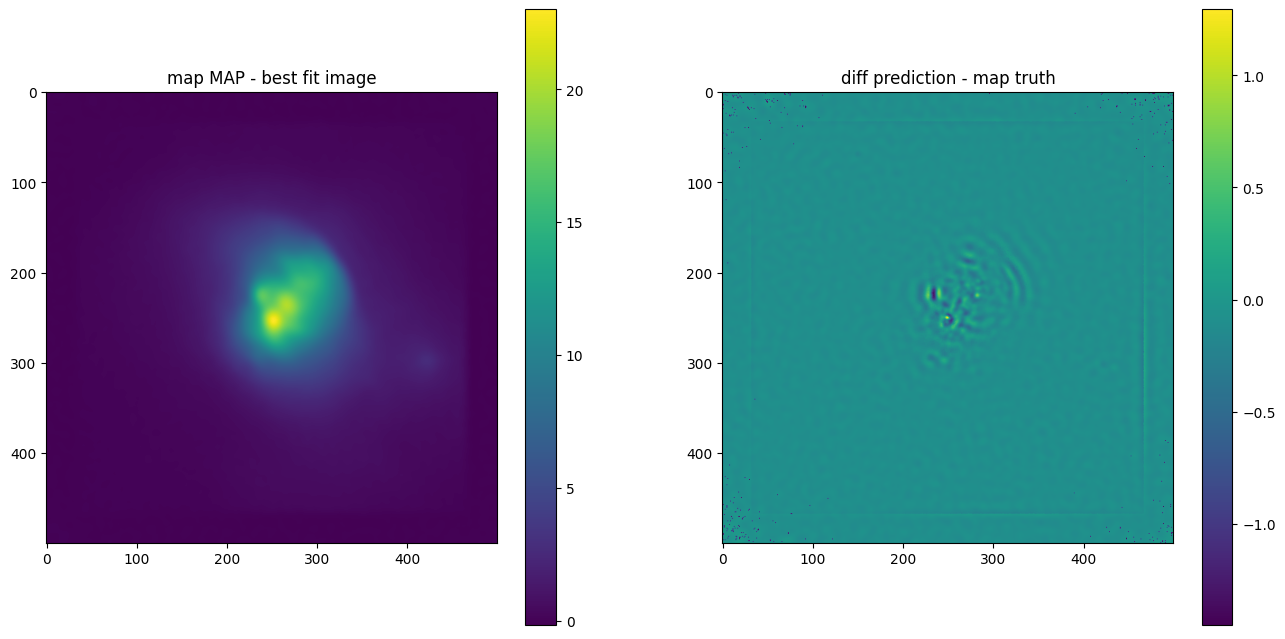

In [43]:
# sig_map = gp_map(samples.pos)*1e-5
sig_map = gp_map(samples.pos)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

im0 = axes[0].imshow(sig_map)
axes[0].title.set_text('map MAP - best fit image')
fig.colorbar(im0)

im1 = axes[1].imshow(sig_map - mapdata_truth)
axes[1].title.set_text('diff prediction - map truth')
fig.colorbar(im1)

plt.show()

In [16]:
# assert False

AssertionError: 

OPTIMIZE_KL: Starting 0001
SL: Iteration 0 ⛰:+8.1636e+09 Δ⛰:inf ➽:5.8419e-02
SL: Iteration 1 ⛰:+2.2448e+09 Δ⛰:5.9188e+09 ➽:5.8419e-02
SL: Iteration 2 ⛰:+1.8412e+09 Δ⛰:4.0358e+08 ➽:5.8419e-02
SL: Iteration 3 ⛰:+1.7611e+09 Δ⛰:8.0041e+07 ➽:5.8419e-02
SL: Iteration 4 ⛰:+1.6194e+09 Δ⛰:1.4169e+08 ➽:5.8419e-02
SL: Iteration 5 ⛰:+1.5859e+09 Δ⛰:3.3541e+07 ➽:5.8419e-02
SL: Iteration 6 ⛰:+1.5661e+09 Δ⛰:1.9769e+07 ➽:5.8419e-02
SL: Iteration 7 ⛰:+1.5588e+09 Δ⛰:7.2935e+06 ➽:5.8419e-02
SL: Iteration 8 ⛰:+1.5537e+09 Δ⛰:5.1447e+06 ➽:5.8419e-02
SL: Iteration 9 ⛰:+1.5466e+09 Δ⛰:7.0911e+06 ➽:5.8419e-02
SL: Iteration 10 ⛰:+1.5412e+09 Δ⛰:5.4097e+06 ➽:5.8419e-02
SL: Iteration 11 ⛰:+1.5375e+09 Δ⛰:3.7054e+06 ➽:5.8419e-02
SL: Iteration 12 ⛰:+1.5244e+09 Δ⛰:1.3119e+07 ➽:5.8419e-02
SL: Iteration 13 ⛰:+1.5230e+09 Δ⛰:1.3937e+06 ➽:5.8419e-02
SL: Iteration 14 ⛰:+1.4970e+09 Δ⛰:2.5925e+07 ➽:5.8419e-02
SL: Iteration 15 ⛰:+1.4826e+09 Δ⛰:1.4476e+07 ➽:5.8419e-02
SL: Iteration 16 ⛰:+1.4217e+09 Δ⛰:6.0851e+07 ➽:5.8419e-02
SL: 

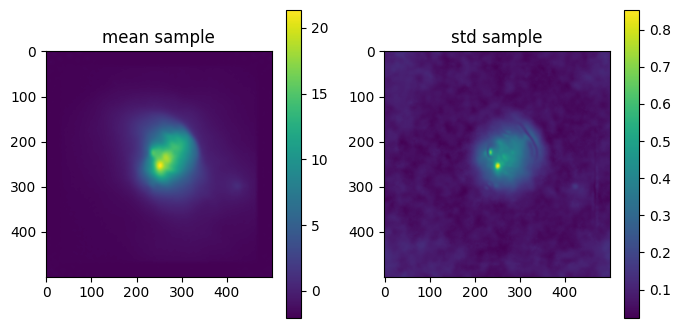

OPTIMIZE_KL: Starting 0002
SL: Iteration 0 ⛰:+1.3301e+08 Δ⛰:inf ➽:5.8419e-02
SL: Iteration 1 ⛰:+8.3572e+07 Δ⛰:4.9437e+07 ➽:5.8419e-02
SL: Iteration 2 ⛰:+7.0403e+07 Δ⛰:1.3170e+07 ➽:5.8419e-02
SL: Iteration 3 ⛰:+1.8780e+07 Δ⛰:5.1623e+07 ➽:5.8419e-02
SL: Iteration 4 ⛰:+1.3939e+07 Δ⛰:4.8414e+06 ➽:5.8419e-02
SL: Iteration 5 ⛰:+1.0646e+07 Δ⛰:3.2922e+06 ➽:5.8419e-02
SL: Iteration 6 ⛰:+9.8660e+06 Δ⛰:7.8041e+05 ➽:5.8419e-02
SL: Iteration 7 ⛰:+8.0922e+06 Δ⛰:1.7738e+06 ➽:5.8419e-02
SL: Iteration 8 ⛰:+8.0902e+06 Δ⛰:2.0233e+03 ➽:5.8419e-02
SL: Iteration 9 ⛰:+7.5483e+06 Δ⛰:5.4187e+05 ➽:5.8419e-02
SL: Iteration 10 ⛰:+7.1070e+06 Δ⛰:4.4130e+05 ➽:5.8419e-02
SL: Iteration 11 ⛰:+7.0677e+06 Δ⛰:3.9302e+04 ➽:5.8419e-02
SL: Iteration 12 ⛰:+5.8579e+06 Δ⛰:1.2098e+06 ➽:5.8419e-02
SL: Iteration 13 ⛰:+5.2554e+06 Δ⛰:6.0251e+05 ➽:5.8419e-02
SL: Iteration 14 ⛰:+4.5244e+06 Δ⛰:7.3094e+05 ➽:5.8419e-02
SL: Iteration 15 ⛰:+4.4713e+06 Δ⛰:5.3131e+04 ➽:5.8419e-02
SL: Iteration 16 ⛰:+3.5634e+06 Δ⛰:9.0788e+05 ➽:5.8419e-02
SL: 

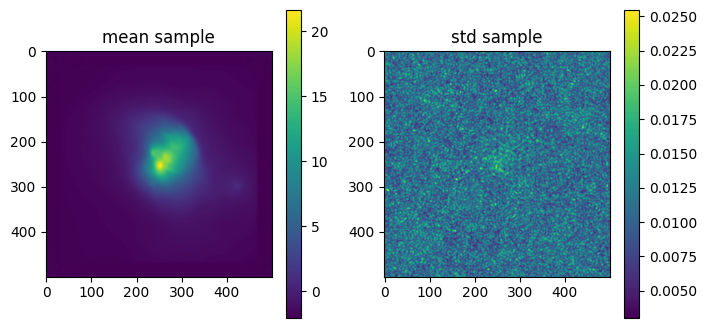

OPTIMIZE_KL: Starting 0003
SL: Iteration 0 ⛰:+1.0446e+09 Δ⛰:inf ➽:5.8419e-02
SL: Iteration 1 ⛰:+1.8259e+08 Δ⛰:8.6197e+08 ➽:5.8419e-02
SL: Iteration 2 ⛰:+2.9326e+07 Δ⛰:1.5327e+08 ➽:5.8419e-02
SL: Iteration 3 ⛰:+1.4137e+07 Δ⛰:1.5189e+07 ➽:5.8419e-02
SL: Iteration 4 ⛰:+1.0582e+07 Δ⛰:3.5548e+06 ➽:5.8419e-02
SL: Iteration 5 ⛰:+8.7440e+06 Δ⛰:1.8383e+06 ➽:5.8419e-02
SL: Iteration 6 ⛰:+8.0964e+06 Δ⛰:6.4766e+05 ➽:5.8419e-02
SL: Iteration 7 ⛰:+7.3057e+06 Δ⛰:7.9066e+05 ➽:5.8419e-02
SL: Iteration 8 ⛰:+7.3002e+06 Δ⛰:5.5304e+03 ➽:5.8419e-02
SL: Iteration 9 ⛰:+6.8786e+06 Δ⛰:4.2161e+05 ➽:5.8419e-02
SL: Iteration 10 ⛰:+6.6825e+06 Δ⛰:1.9607e+05 ➽:5.8419e-02
SL: Iteration 11 ⛰:+6.4801e+06 Δ⛰:2.0237e+05 ➽:5.8419e-02
SL: Iteration 12 ⛰:+5.3120e+06 Δ⛰:1.1681e+06 ➽:5.8419e-02
SL: Iteration 13 ⛰:+4.8492e+06 Δ⛰:4.6275e+05 ➽:5.8419e-02
SL: Iteration 14 ⛰:+4.7512e+06 Δ⛰:9.8029e+04 ➽:5.8419e-02
SL: Iteration 15 ⛰:+4.3603e+06 Δ⛰:3.9089e+05 ➽:5.8419e-02
SL: Iteration 16 ⛰:+3.6899e+06 Δ⛰:6.7040e+05 ➽:5.8419e-02
SL: 

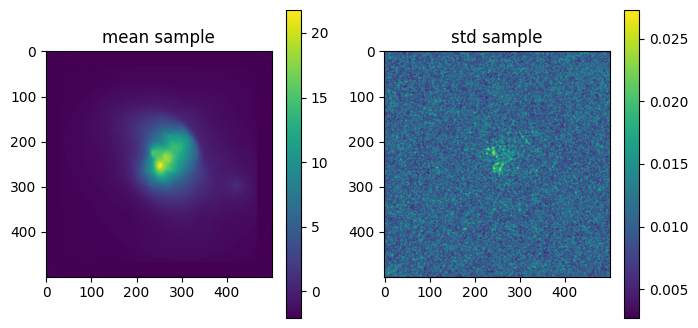

OPTIMIZE_KL: Starting 0004
SL: Iteration 0 ⛰:+1.0851e+09 Δ⛰:inf ➽:5.8419e-02
SL: Iteration 1 ⛰:+3.5886e+08 Δ⛰:7.2624e+08 ➽:5.8419e-02
SL: Iteration 2 ⛰:+2.6490e+07 Δ⛰:3.3237e+08 ➽:5.8419e-02
SL: Iteration 3 ⛰:+1.3958e+07 Δ⛰:1.2532e+07 ➽:5.8419e-02
SL: Iteration 4 ⛰:+1.1641e+07 Δ⛰:2.3163e+06 ➽:5.8419e-02
SL: Iteration 5 ⛰:+8.7456e+06 Δ⛰:2.8959e+06 ➽:5.8419e-02
SL: Iteration 6 ⛰:+8.1922e+06 Δ⛰:5.5331e+05 ➽:5.8419e-02
SL: Iteration 7 ⛰:+6.7744e+06 Δ⛰:1.4179e+06 ➽:5.8419e-02
SL: Iteration 8 ⛰:+6.7721e+06 Δ⛰:2.3008e+03 ➽:5.8419e-02
SL: Iteration 9 ⛰:+6.4443e+06 Δ⛰:3.2774e+05 ➽:5.8419e-02
SL: Iteration 10 ⛰:+6.4057e+06 Δ⛰:3.8620e+04 ➽:5.8419e-02
SL: Iteration 11 ⛰:+5.8548e+06 Δ⛰:5.5094e+05 ➽:5.8419e-02
SL: Iteration 12 ⛰:+5.3254e+06 Δ⛰:5.2939e+05 ➽:5.8419e-02
SL: Iteration 13 ⛰:+4.5919e+06 Δ⛰:7.3351e+05 ➽:5.8419e-02
SL: Iteration 14 ⛰:+4.2321e+06 Δ⛰:3.5973e+05 ➽:5.8419e-02
SL: Iteration 15 ⛰:+4.2308e+06 Δ⛰:1.3749e+03 ➽:5.8419e-02
SL: Iteration 16 ⛰:+3.4620e+06 Δ⛰:7.6872e+05 ➽:5.8419e-02
SL: 

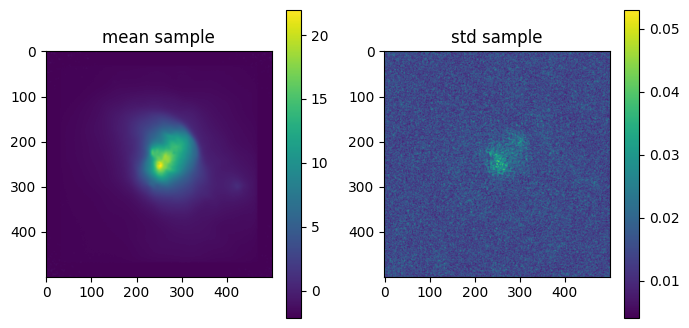

OPTIMIZE_KL: Starting 0005
SL: Iteration 0 ⛰:+2.0448e+09 Δ⛰:inf ➽:5.8419e-02
SL: Iteration 1 ⛰:+4.9988e+07 Δ⛰:1.9948e+09 ➽:5.8419e-02
SL: Iteration 2 ⛰:+2.9530e+07 Δ⛰:2.0458e+07 ➽:5.8419e-02
SL: Iteration 3 ⛰:+1.6567e+07 Δ⛰:1.2963e+07 ➽:5.8419e-02
SL: Iteration 4 ⛰:+1.2807e+07 Δ⛰:3.7596e+06 ➽:5.8419e-02
SL: Iteration 5 ⛰:+1.0639e+07 Δ⛰:2.1680e+06 ➽:5.8419e-02
SL: Iteration 6 ⛰:+9.5829e+06 Δ⛰:1.0566e+06 ➽:5.8419e-02
SL: Iteration 7 ⛰:+8.5831e+06 Δ⛰:9.9978e+05 ➽:5.8419e-02
SL: Iteration 8 ⛰:+8.5136e+06 Δ⛰:6.9477e+04 ➽:5.8419e-02
SL: Iteration 9 ⛰:+7.5980e+06 Δ⛰:9.1564e+05 ➽:5.8419e-02
SL: Iteration 10 ⛰:+6.9593e+06 Δ⛰:6.3863e+05 ➽:5.8419e-02
SL: Iteration 11 ⛰:+6.9499e+06 Δ⛰:9.4739e+03 ➽:5.8419e-02
SL: Iteration 12 ⛰:+6.0207e+06 Δ⛰:9.2915e+05 ➽:5.8419e-02
SL: Iteration 13 ⛰:+5.2310e+06 Δ⛰:7.8977e+05 ➽:5.8419e-02
SL: Iteration 14 ⛰:+5.1370e+06 Δ⛰:9.3967e+04 ➽:5.8419e-02
SL: Iteration 15 ⛰:+4.2207e+06 Δ⛰:9.1633e+05 ➽:5.8419e-02
SL: Iteration 16 ⛰:+3.1048e+06 Δ⛰:1.1159e+06 ➽:5.8419e-02
SL: 

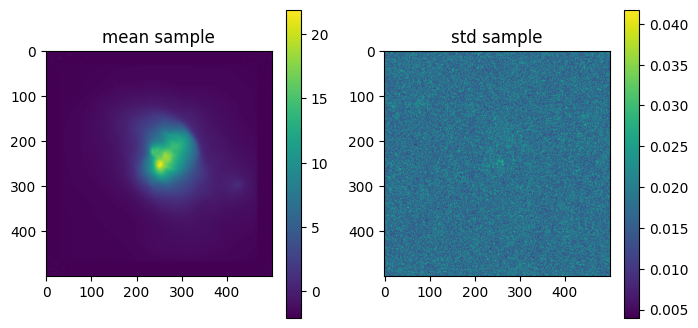

OPTIMIZE_KL: Starting 0006
SL: Iteration 0 ⛰:+8.1216e+07 Δ⛰:inf ➽:5.8419e-02
SL: Iteration 1 ⛰:+4.6639e+07 Δ⛰:3.4576e+07 ➽:5.8419e-02
SL: Iteration 2 ⛰:+4.0736e+07 Δ⛰:5.9032e+06 ➽:5.8419e-02
SL: Iteration 3 ⛰:+2.2273e+07 Δ⛰:1.8463e+07 ➽:5.8419e-02
SL: Iteration 4 ⛰:+1.4212e+07 Δ⛰:8.0608e+06 ➽:5.8419e-02
SL: Iteration 5 ⛰:+1.1976e+07 Δ⛰:2.2356e+06 ➽:5.8419e-02
SL: Iteration 6 ⛰:+1.0358e+07 Δ⛰:1.6185e+06 ➽:5.8419e-02
SL: Iteration 7 ⛰:+9.1152e+06 Δ⛰:1.2428e+06 ➽:5.8419e-02
SL: Iteration 8 ⛰:+8.9453e+06 Δ⛰:1.6986e+05 ➽:5.8419e-02
SL: Iteration 9 ⛰:+7.5789e+06 Δ⛰:1.3664e+06 ➽:5.8419e-02
SL: Iteration 10 ⛰:+7.1283e+06 Δ⛰:4.5060e+05 ➽:5.8419e-02
SL: Iteration 11 ⛰:+7.0627e+06 Δ⛰:6.5661e+04 ➽:5.8419e-02
SL: Iteration 12 ⛰:+5.5551e+06 Δ⛰:1.5076e+06 ➽:5.8419e-02
SL: Iteration 13 ⛰:+5.0608e+06 Δ⛰:4.9426e+05 ➽:5.8419e-02
SL: Iteration 14 ⛰:+4.4001e+06 Δ⛰:6.6073e+05 ➽:5.8419e-02
SL: Iteration 15 ⛰:+4.3987e+06 Δ⛰:1.3548e+03 ➽:5.8419e-02
SL: Iteration 16 ⛰:+3.3207e+06 Δ⛰:1.0780e+06 ➽:5.8419e-02
SL: 

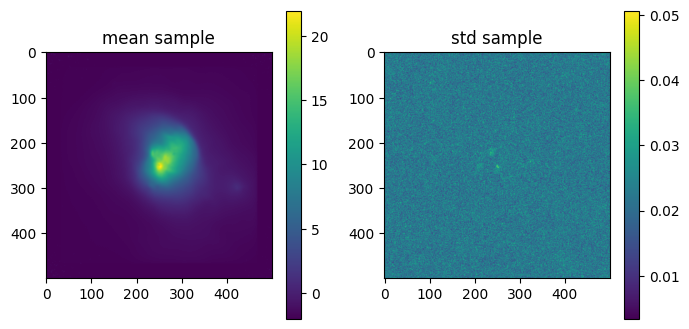

In [45]:
n_it = 6
# delta = 1e-4
delta = 1e-6
n_samples = 8 # no samples -> maximum aposteriory posterior

key, k_i, k_o = random.split(key, 3)

# callback fn for plotting during optimisation:
def callback(samples, opt_state):
    mean, std = jft.mean_and_std(tuple(signal_response(s) for s in samples))
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    im0 = axes[0].imshow(mean)
    axes[0].title.set_text('mean sample')
    fig.colorbar(im0)

    im1 = axes[1].imshow(std)
    axes[1].title.set_text('std sample')
    fig.colorbar(im1)
    
    plt.show()

samples, state = jft.optimize_kl(
    lh, # likelihood
    jft.Vector(lh.init(k_i)), # initial position in model space (initialisation)
    n_total_iterations=n_it, # no of optimisation steps (global)
    n_samples=n_samples, # draw samples
    key=k_o, # random jax init
    draw_linear_kwargs=dict( # sampling parameters
        cg_name="SL",
        cg_kwargs=dict(absdelta=delta * jft.size(lh.domain) / 10.0, maxiter=100),
    ),
    nonlinearly_update_kwargs=dict( # map from multivariate gaussian to more compl. distribution (coordinate transformations)
        minimize_kwargs=dict(
            name="SN",
            xtol=delta,
            cg_kwargs=dict(name=None),
            maxiter=5,
        )
    ),
    kl_kwargs=dict( # shift transformed multivar gauss to best match true posterior
        minimize_kwargs=dict(
            name="M", xtol=delta, cg_kwargs=dict(name=None), maxiter=100
        )
    ),
    sample_mode="nonlinear_resample", # how steps are combined (samples + nonlin + KL)
    callback=callback,
)

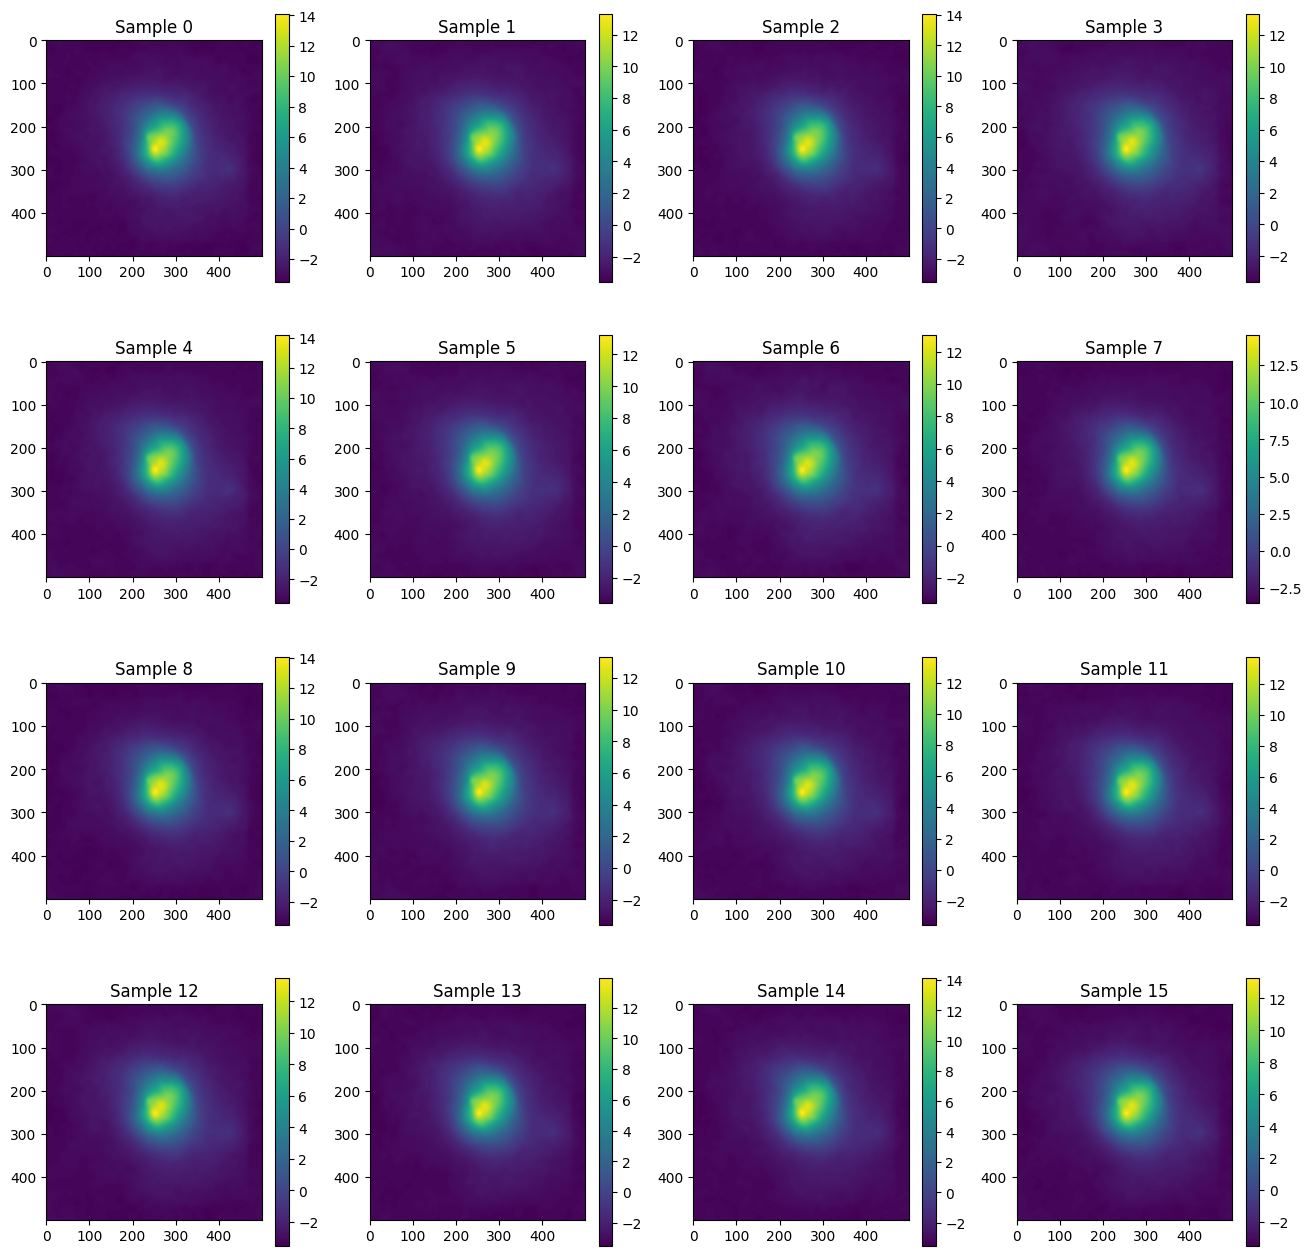

In [50]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

i = 0
for s in samples:
    # print(i//4, i%4)
    # im = axes[i//4][i%4].imshow(signal_response(s))
    im = axes[i//4][i%4].imshow(gp_cmb(s))
    axes[i//4][i%4].title.set_text(f"Sample {i}")
    fig.colorbar(im)
    
    i += 1

plt.show()

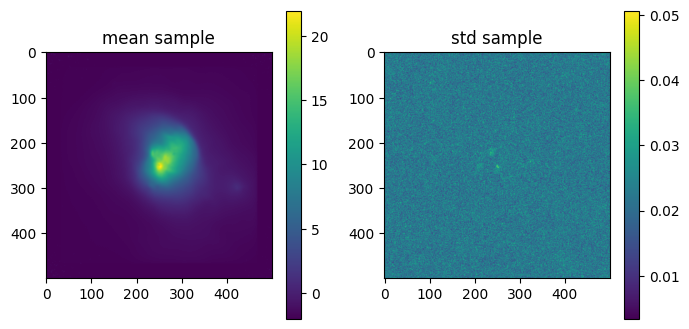

In [48]:
mean, std = jft.mean_and_std(tuple(signal_response(s) for s in samples))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

im0 = axes[0].imshow(mean)
axes[0].title.set_text('mean sample')
fig.colorbar(im0)

im1 = axes[1].imshow(std)
axes[1].title.set_text('std sample')
fig.colorbar(im1)

plt.show()